# 神经网络 逻辑回归 二分类 $\sigma(Z)$ 函数


## 激活函数 
逻辑回归 与 线性回归，最大的区别是值域空间不同。  
> 线性 $Z \in (-\infty,+\infty)$   
> 逻辑 $A \in [0,+1]$。   

线性回归，可以看作是激活函数的一个特例 （值域空间没有变化）
> $g{(Z)} = Z = A$

逻辑回归，我们在两个值域空间中加入一个 $\sigma(Z)$ 映射函数   
> $A=\sigma{(Z)} \in [0,+1]$  

为了满足这个映射，数学家设计出了 $\sigma$ 函数，也叫逻辑回归函数。   
有两种写法：  
 > $\sigma(x)=\frac{1}{1+e^{-x}}=\frac{e^{x}}{e^{x}+1}=A$  
 
导函数  
> $\sigma^\prime{(x)} = {\sigma(x)}{(1-\sigma(x))}$  
> $\sigma^\prime{(x)} = A{(1-A)}$

其实 函数的不一定非用 e 为低，都可以完成值域上的映射。最终选择 e， 也是为了计算方便（梯度对数归一化）。


## 损失函数
线性回归： 
> $\mathcal{L}(A,Y) = \mathcal{L}(g{(Z)},Y) = \mathcal{L}(Z,Y) = \frac{1}{2}(Z-Y)^2$  
>  
> $\frac{\delta{\mathcal{L}(Z,Y)}} {\delta{Z}} = A-Y$

逻辑回归： 
> $\mathcal{L}(A,Y) = \mathcal{L}(\sigma{(Z)},Y)$  
>  
> $\frac{\mathcal{L}(\sigma{(Z)},Y)}{\delta{Z}} \text{期望} = A-Y$


## 交叉熵 （Cross-Entropy)

有了$\frac{\delta{\mathcal{L}(\sigma{(Z)},Y)}}{\delta{Z}} = A-Y$ 的期望，又有了 $\sigma(x)=\frac{1}{1+e^{-x}}$ 函数，自然就推导出了 交叉熵函数   
> $\mathcal{L}(A,Y) = -(YlogA+(1-Y)log(1-A))$  

> $\frac{\delta{\mathcal{L}(A,Y)}}{\delta{A}} = -\frac{Y}{A} + \frac{(1-Y)}{(1-A)}$

> $\frac{\delta{\mathcal{L}(\sigma{(Z)},Y)}}{\delta{Z}}= \frac{\delta{\mathcal{L}(A,Y)}}{\delta{Z}} = A-Y$

## 神经网络实现逻辑回归

In [1]:
import sys
sys.path.append('..')
from jnn.plot import *
from jnn.nn import *
from jnn.dataFactory import *
from jnn.activFun import eaActivFun
from jnn.costFun import eaCostFun
from jnn.ea import Ea

## 逻辑回归神经网络构造器

In [2]:
def eaNetLogistics(eaData,L,n):
    net = Ea()
    net.L = 2
    net.n[0] = eaData.X.shape[0]  # nx
    for l in range(1,L):
        net.n[l] = 20
        net.activFun[l] = eaActivFun.relu
    net.n[net.L] = 1
    net.activFun[net.L] = eaActivFun.sigmoid

    net.costFun = eaCostFun.L3
    return net

## 构造一个二分类问题的测试数据

In [3]:
eaData = eaDataTFRing()

## 构造两层神经网络，隐层有20个神经元

In [4]:
net = eaNetLogistics(eaData,2,20)
Ea.show(net)


 □[net]
 ├─ ☞[L]: 2 
 ├─□[activFun]
 │ ├─□[1]
 │ │ ├─ ☞[dg]: dRelu() 
 │ │ ├─ ☞[g]: relu() 
 │ │ └─ ☞[name]: 'relu' 
 │ └─□[2]
 │   ├─ ☞[dg]: dSigmoid() 
 │   ├─ ☞[g]: sigmoid() 
 │   └─ ☞[name]: 'sigmoid' 
 ├─□[costFun]
 │ ├─ ☞[J]: cross() 
 │ ├─ ☞[dJ]: dCross() 
 │ └─ ☞[name]: 'cross' 
 └─□[n]
   ├─ ☞[0]: 2 
   ├─ ☞[1]: 20 
   └─ ☞[2]: 1 



## 初始化网络参数，并训练网络

In [5]:
net = nnInitWb(net)
net = nnFit(eaData, net, learn_rate=0.1)

## 绘制预测结果

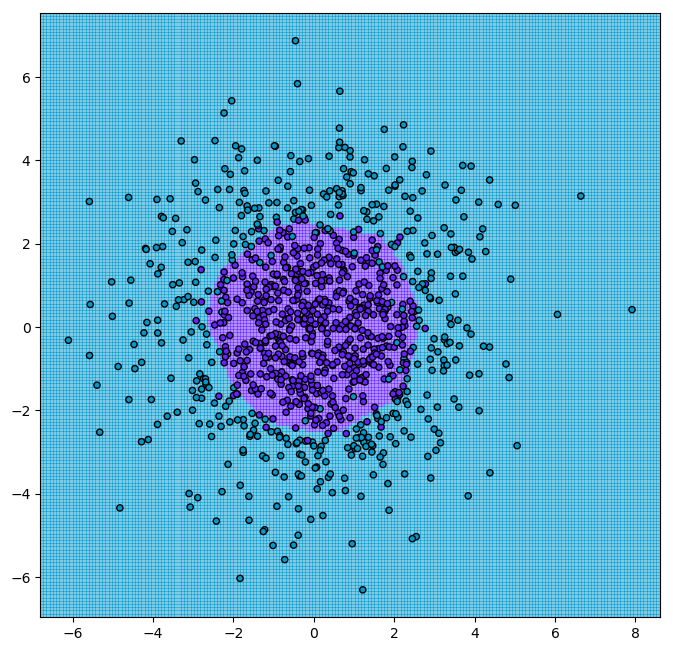

In [6]:
plotPredict(net, eaData.X, eaData.Y, cmap=['#0099CC', '#6622FF'])

## 绘制代价函数收敛情况

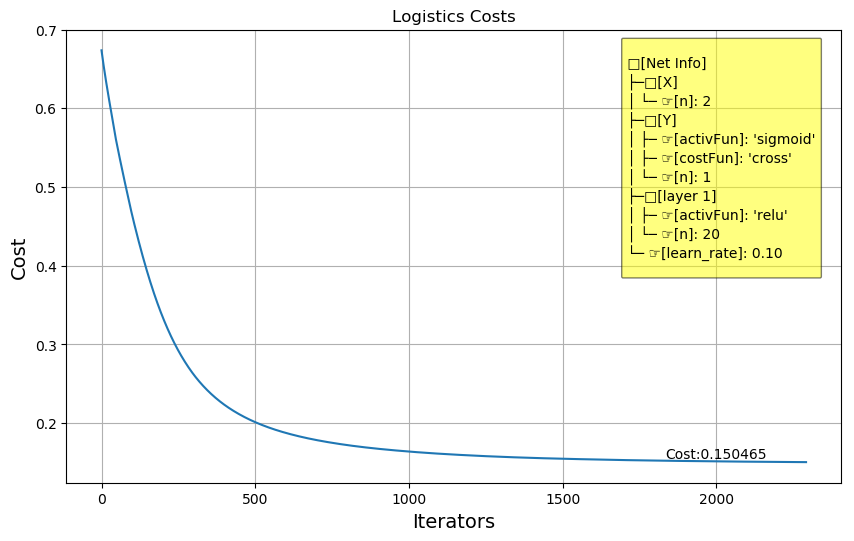

In [7]:
plotCost("Logistics Costs", net.costs,netInfo=eaNetInfo(net))